In [38]:
import pandas as pd
import numpy as np
import scipy
import math

from scipy.stats import pearsonr, mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [3]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
exp_clicks = np.sum(data[data.slot == 'exp'].n_clicks)
ctrl_clicks = np.sum(data[data.slot == 'control'].n_clicks)
print("{0:.3f}".format(float(exp_clicks - ctrl_clicks) / ctrl_clicks *100))

1.614


In [5]:
# Q1 - 1.614

In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [7]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [8]:
exp_clicks = data[data.slot == 'exp'].n_clicks.values
ctrl_clicks = data[data.slot == 'control'].n_clicks.values

In [9]:
np.random.seed(0)

exp_clicks_scores = np.array(list(map(np.mean, get_bootstrap_samples(exp_clicks, 1000))))
ctrl_clicks_scores = np.array(list(map(np.mean, get_bootstrap_samples(ctrl_clicks, 1000))))

means_diff = exp_clicks_scores - ctrl_clicks_scores

In [10]:
print("95% confidence interval for the mean: ",  stat_intervals(means_diff, 0.05))

95% confidence interval for the mean:  [ 0.19172563  0.40475697]


In [11]:
np.random.seed(0)

exp_clicks_scores = np.array(list(map(np.median, get_bootstrap_samples(exp_clicks, 1000))))
ctrl_clicks_scores = np.array(list(map(np.median, get_bootstrap_samples(ctrl_clicks, 1000))))

medians_diff = exp_clicks_scores - ctrl_clicks_scores

In [12]:
print("95% confidence interval for the median: ",  stat_intervals(medians_diff, 0.05))

95% confidence interval for the median:  [ 1.  1.]


In [13]:
np.random.seed(0)
n_boot_samples = 500

In [14]:
ctrl_samples = get_bootstrap_samples(ctrl_clicks, n_boot_samples)

In [15]:
ctrl_samples_means = np.mean(ctrl_samples,axis=1)

In [20]:
control_boot_chi_squared = np.sum(np.square((ctrl_samples - ctrl_samples_means[:, np.newaxis])),axis=1)

((array([ 284550.00790142,  284550.28984073,  284550.44837459,
          284550.56078615,  284550.64886689,  284550.72177909,
          284550.78427733,  284550.83915848,  284550.88821233,
          284550.93265597,  284550.97335597,  284551.01095206,
          284551.04593046,  284551.07866967,  284551.10947035,
          284551.13857541,  284551.16618407,  284551.1924618 ,
          284551.2175476 ,  284551.24155939,  284551.26459814,
          284551.28675096,  284551.30809357,  284551.3286922 ,
          284551.34860517,  284551.36788405,  284551.38657472,
          284551.40471817,  284551.42235117,  284551.43950686,
          284551.45621519,  284551.47250333,  284551.48839601,
          284551.50391582,  284551.51908341,  284551.53391776,
          284551.54843633,  284551.56265521,  284551.57658929,
          284551.59025236,  284551.60365721,  284551.61681574,
          284551.62973905,  284551.64243747,  284551.65492068,
          284551.66719774,  284551.67927713,  284551.69

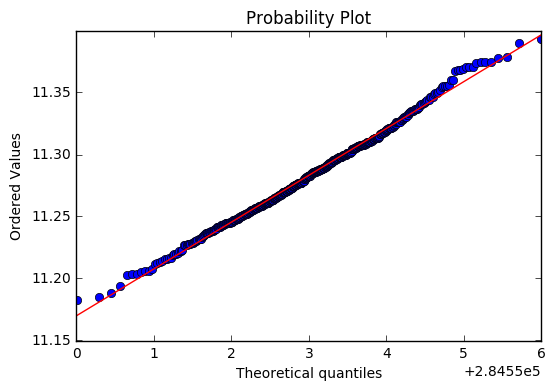

In [27]:
scipy.stats.probplot(ctrl_samples_means, sparams=(len(ctrl_clicks)-1), plot=plt)

((array([ 282301.08823052,  282512.70968151,  282631.75042717,
          282716.17888969,  282782.3450597 ,  282837.12445286,
          282884.08540284,  282925.32718789,  282962.19330369,
          282995.59740261,  283026.19007273,  283054.45161344,
          283080.74708391,  283105.36069051,  283128.51819018,
          283150.40200679,  283171.16173792,  283190.92164617,
          283209.78611976,  283227.84373074,  283245.17030322,
          283261.83126848,  283277.88349787,  283293.37674667,
          283308.35480452,  283322.85642111,  283336.91605832,
          283350.56450624,  283363.82939197,  283376.73560265,
          283389.30563983,  283401.55991797,  283413.51701739,
          283425.19389989,  283436.60609342,  283447.76785089,
          283458.69228763,  283469.39150054,  283479.87667212,
          283490.1581613 ,  283500.24558336,  283510.1478802 ,
          283519.87338258,  283529.42986513,  283538.82459547,
          283548.06437779,  283557.15559197,  283566.10

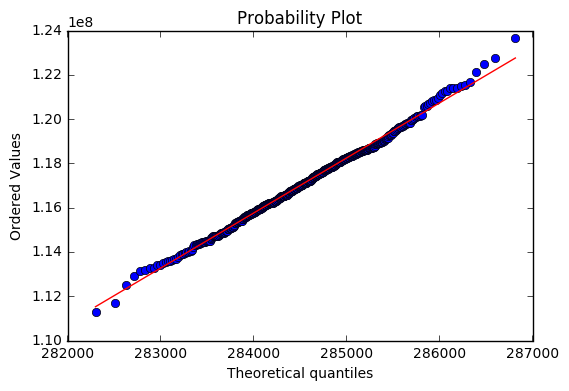

In [26]:
scipy.stats.probplot(control_boot_chi_squared, dist="chi2", 
                     sparams=(len(ctrl_clicks)-1), plot=plt)

In [28]:
data_exp = data[data.slot == 'exp']
data_ctrl = data[data.slot == 'control']

In [30]:
data_exp.head(2)

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2


In [34]:
data_exp_grouped = data_exp.groupby('userID').sum()
data_ctrl_grouped = data_ctrl.groupby('userID').sum()

In [35]:
data_exp_grouped.shape

(281450, 3)

In [36]:
data_ctrl_grouped.shape

(284392, 3)

In [39]:
mannwhitneyu(data_exp_grouped.n_clicks, data_ctrl_grouped.n_clicks)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [42]:
browsers = data.browser.unique()

In [47]:
results = []
for browser in browsers:
    data_exp_grouped = data_exp[data_exp.browser == browser].groupby('userID').sum()
    data_ctrl_grouped = data_ctrl[data_ctrl.browser == browser].groupby('userID').sum()
    
    st, p = mannwhitneyu(data_exp_grouped.n_clicks,
                         data_ctrl_grouped.n_clicks)
    
    results.append([browser, st, p])

In [48]:
results_df = pd.DataFrame(results, columns=['Browser', 'St', 'p'])

In [49]:
results_df

,Browser,St,p
0,Browser #2,1.522573e+09,0.027244
1,Browser #4,3.072448e+09,0.407606
2,Browser #14,8.069847e+08,0.000000
3,Browser #17,1.313897e+08,0.037401
4,Browser #20,1.437918e+08,0.453667
5,Browser #22,2.547598e+09,0.257406


In [50]:
reject, p_corrected, a1, a2 = multipletests(results_df.p, 
                                            alpha = 0.05, 
                                            method = 'holm') 
results_df['p_corrected'] = p_corrected
results_df['reject'] = reject

In [51]:
results_df

,Browser,St,p,p_corrected,reject
0,Browser #2,1.522573e+09,0.027244,0.136219,False
1,Browser #4,3.072448e+09,0.407606,0.815212,False
2,Browser #14,8.069847e+08,0.000000,0.000000,True
3,Browser #17,1.313897e+08,0.037401,0.149602,False
4,Browser #20,1.437918e+08,0.453667,0.815212,False
5,Browser #22,2.547598e+09,0.257406,0.772217,False


In [52]:
#Q6 - 5

In [53]:
results = []
for browser in browsers:
    d_ctrl = data_ctrl[data_ctrl.browser==browser]
    d_exp = data_exp[data_exp.browser==browser]
    d_ctrl_prop = float(np.sum(d_ctrl.n_nonclk_queries))/np.sum(d_ctrl.n_queries) * 100
    d_exp_prop = float(np.sum(d_exp.n_nonclk_queries))/np.sum(d_exp.n_queries) * 100
    results.append([browser, d_ctrl_prop, d_exp_prop])

In [54]:
browser_props = pd.DataFrame(results, columns=['browser', 'ctrl', 'exp'])

In [55]:
browser_props

,browser,ctrl,exp
0,Browser #2,45.962747,44.982747
1,Browser #4,46.970930,45.142942
2,Browser #14,57.590411,43.755617
3,Browser #17,36.299367,36.937413
4,Browser #20,40.540485,38.977376
5,Browser #22,40.593977,39.853947
